In [78]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("USvideos.csv")    

# group by channel and no. of unique uploads
channel_categories = df.groupby("channel_title")["category_id"].unique()

g = nx.Graph()

# add edges between all pairs of categories in same channel
for categories in channel_categories:
    
    # channels must post in more than 1 category to make pairs
    if len(categories) > 1:
        for i in range(len(categories)):
            # make sure we don't compare categories to itself
            for j in range(i + 1, len(categories)):
                c1, c2 = categories[i], categories[j]
                
                if g.has_edge(c1, c2):
                    g[c1][c2]["weight"] += 1
                else:
                    g.add_edge(c1, c2, weight=1)

# measure centrality
centrality_degree = nx.degree_centrality(g)
top_k = 20
for x in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
  print(x, centrality_degree[x])

24 0.9333333333333333
25 0.8666666666666667
26 0.8666666666666667
22 0.8666666666666667
1 0.8
23 0.8
10 0.8
15 0.8
28 0.8
17 0.8
19 0.8
2 0.7333333333333333
27 0.6666666666666666
20 0.4
29 0.26666666666666666
43 0.13333333333333333


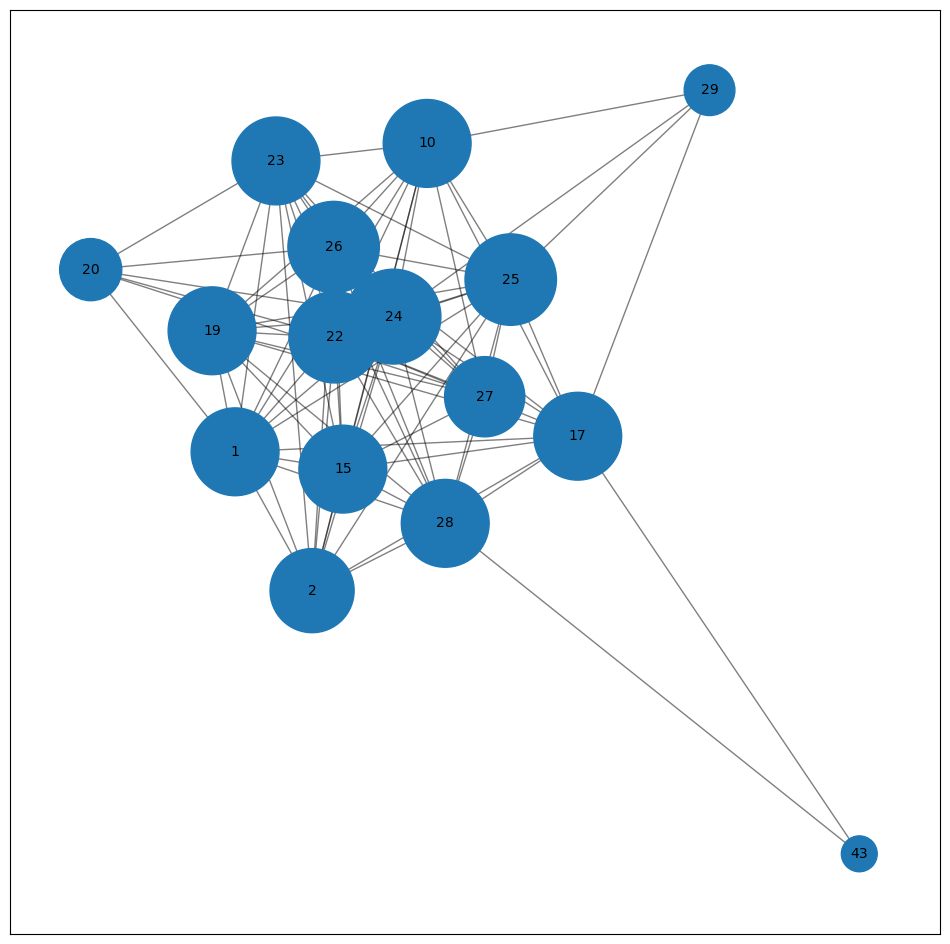

In [80]:
node_sizes = [5000 * centrality_values.get(node, 0.1) for node in g.nodes()]
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(g, pos, node_size=node_sizes)
nx.draw_networkx_edges(g, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(g, pos, font_size=10)
plt.show()